In [106]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import control as ct
import slycot



In [107]:
# Paleta de cores
cp = {
    'red': (1.0, 0.349, 0.369, 1.0),
    'green': (0.541, 0.788, 0.149, 1.0),
    'blue': (0.098, 0.510, 0.769, 1.0),
    'lred': (1.0, 0.588, 0.6, 1.0),
    'lgreen': (0.722, 0.894, 0.443, 1.0),
    'lblue': (0.369, 0.706, 0.918, 1.0),
    'dred': (0.839,0.0,0.027),
    'dgreen': (0.341,0.494,0.094),
    'dblue': (0.063,0.318,0.475),
    'orange': (1.0, 0.506, 0.227, 1.0),
    'yellow': (1.0, 0.792, 0.227, 1.0),
    'pink': (1.0, 0.349, 0.611, 1.0),
    'purple': (0.416, 0.298, 0.576, 1.0),
    'turquoise': (0.098, 0.761, 0.769, 1.0),
    'brown': (0.576, 0.380, 0.298, 1.0)
}

In [108]:
# dimensões do modelo
n = 6 # variáveis de estado
r = 2 # entradas de controle
l = 1 # entradas de distúrbio
m = 3 # saídas

In [109]:
A = np.array([
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1],
    [0, -7.36, 0.79, 0, 0.29, -0.14],
    [0, 73.58, -33.11, 0, -3.66, 2.16],
    [0, -58.86, 51.15, 0, 3.64, -2.44]
])

B = np.array([
    [0, 0],
    [0, 0],
    [0, 0],
    [0.61, 1.79],
    [-1.5, -27],
    [0.29, 30.54]
])

C = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
])

D = np.array([
    [0, 0],
    [0, 0],
    [0, 0]
])

E = np.array([
    [0],
    [0],
    [0],
    [0.29],
    [-12],
    [18.54]
])

In [110]:
esp_estados = ct.ss(A, B, C, D)
esp_estados

StateSpace(array([[  0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   1.  ],
       [  0.  ,  -7.36,   0.79,   0.  ,   0.29,  -0.14],
       [  0.  ,  73.58, -33.11,   0.  ,  -3.66,   2.16],
       [  0.  , -58.86,  51.15,   0.  ,   3.64,  -2.44]]), array([[  0.  ,   0.  ],
       [  0.  ,   0.  ],
       [  0.  ,   0.  ],
       [  0.61,   1.79],
       [ -1.5 , -27.  ],
       [  0.29,  30.54]]), array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]]), array([[0., 0.],
       [0., 0.],
       [0., 0.]]))

Dado que a matriz C corresponde à metade de cima da matriz identidade 6x6, tranformação de variáveis não é necessário

In [111]:
V = np.eye(6)[m:, :]  # ou no caso mais geral, use V = la.null_space(C).T
T = np.block([[C], [V]])
Ti = la.inv(T)
Ti

array([[ 1., -0.,  0., -0.,  0., -0.],
       [ 0.,  1.,  0., -0.,  0., -0.],
       [ 0.,  0.,  1., -0.,  0., -0.],
       [ 0.,  0.,  0.,  1.,  0., -0.],
       [ 0.,  0.,  0.,  0.,  1., -0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.]])

In [112]:
M = Ti[:, 0:m]
M

array([[ 1., -0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [113]:
N = Ti[:, m:]
N

array([[-0.,  0., -0.],
       [-0.,  0., -0.],
       [-0.,  0., -0.],
       [ 1.,  0., -0.],
       [ 0.,  1., -0.],
       [ 0.,  0.,  1.]])

In [114]:
A11 = C @ A @ M
A11

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [115]:
A12 = C @ A @ N
A12

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [116]:
A21 = V @ A @ M
A21

array([[  0.  ,  -7.36,   0.79],
       [  0.  ,  73.58, -33.11],
       [  0.  , -58.86,  51.15]])

In [117]:
A22 = V @ A @ N
A22

array([[ 0.  ,  0.29, -0.14],
       [ 0.  , -3.66,  2.16],
       [ 0.  ,  3.64, -2.44]])

In [118]:
B1 = C @ B
B1

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [119]:
B2 = V @ B
B2

array([[  0.61,   1.79],
       [ -1.5 , -27.  ],
       [  0.29,  30.54]])

### Observabilidade e controlabilidade para ordem reduzida

In [120]:
# teste de controlablidade para o par (A22, A12)
Obs2 = ct.obsv(A22, A12)
Obs2

array([[  1.   ,   0.   ,   0.   ],
       [  0.   ,   1.   ,   0.   ],
       [  0.   ,   0.   ,   1.   ],
       [  0.   ,   0.29 ,  -0.14 ],
       [  0.   ,  -3.66 ,   2.16 ],
       [  0.   ,   3.64 ,  -2.44 ],
       [  0.   ,  -1.571,   0.968],
       [  0.   ,  21.258, -13.176],
       [  0.   , -22.204,  13.816]])

In [121]:
# posto da matriz de observabilidade reduzida
np.linalg.matrix_rank(Obs2)

3

### LQR

In [122]:
R = np.diag([10, 100])
Q = np.diag([10000,1,1000,1,1,1])

R,Q

(array([[ 10,   0],
        [  0, 100]]),
 array([[10000,     0,     0,     0,     0,     0],
        [    0,     1,     0,     0,     0,     0],
        [    0,     0,  1000,     0,     0,     0],
        [    0,     0,     0,     1,     0,     0],
        [    0,     0,     0,     0,     1,     0],
        [    0,     0,     0,     0,     0,     1]]))

In [123]:
K, P, CLpoles = ct.lqr(esp_estados, Q, R)
CLpoles 

array([-11.711505 +2.3256347j , -11.711505 -2.3256347j ,
        -3.0511801+2.174324j  ,  -3.0511801-2.174324j  ,
        -3.899408 +0.90076333j,  -3.899408 -0.90076333j], dtype=complex64)

In [124]:
K.shape[0],E.shape[1]

(2, 1)

In [125]:
# Matrix de estados em MF
A_c = A - B@K
A_c

array([[   0.        ,    0.        ,    0.        ,    1.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           1.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    1.        ],
       [  26.25553612,   71.69143029,   40.93929415,   22.88449931,
          18.65718632,   13.42457679],
       [-229.11150438, -465.7878061 , -198.00173568, -171.29232185,
        -121.45568655,  -74.76351543],
       [ 228.66106753,  431.94445822,  157.16150591,  161.98781666,
         107.79157677,   61.24700145]])

In [126]:
# verificando autovalores e autovetores em malha fechada
la.eig(A_c)

(array([ -3.05118009+2.17432413j,  -3.05118009-2.17432413j,
         -3.89940812+0.90076334j,  -3.89940812-0.90076334j,
        -11.71150468+2.32563477j, -11.71150468-2.32563477j]),
 array([[ 0.13439002-0.03890174j,  0.13439002+0.03890174j,
          0.0468614 -0.02940934j,  0.0468614 +0.02940934j,
          0.00428155+0.00112576j,  0.00428155-0.00112576j],
        [-0.15395747-0.10971277j, -0.15395747+0.10971277j,
         -0.20385202-0.04708982j, -0.20385202+0.04708982j,
         -0.05664784-0.01322385j, -0.05664784+0.01322385j],
        [-0.0849361 -0.06303147j, -0.0849361 +0.06303147j,
         -0.08304889-0.0709541j , -0.08304889+0.0709541j ,
          0.05853862+0.01162442j,  0.05853862-0.01162442j],
        [-0.32546314+0.41090367j, -0.32546314-0.41090367j,
         -0.15624088+0.15689005j, -0.15624088-0.15689005j,
         -0.05276155-0.00322701j, -0.05276155+0.00322701j],
        [ 0.70830309+0.j        ,  0.70830309-0.j        ,
          0.837319  +0.j        ,  0.837319  -0

In [127]:
CL_U = ct.ss(A_c, E, -K, np.zeros((K.shape[0], E.shape[1])))
CL_X0 = ct.ss(A_c, E, np.array([[1, 0, 0, 0, 0, 0]]), np.array([[0]]))
CL_X1 = ct.ss(A_c, E, np.array([[0, 1, 0, 0, 0, 0]]), np.array([[0]]))
CL_X2 = ct.ss(A_c, E, np.array([[0, 0, 1, 0, 0, 0]]), np.array([[0]]))

CL_U

StateSpace(array([[   0.        ,    0.        ,    0.        ,    1.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           1.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    1.        ],
       [  26.25553612,   71.69143029,   40.93929415,   22.88449931,
          18.65718632,   13.42457679],
       [-229.11150438, -465.7878061 , -198.00173568, -171.29232185,
        -121.45568655,  -74.76351543],
       [ 228.66106753,  431.94445822,  157.16150591,  161.98781666,
         107.79157677,   61.24700145]]), array([[  0.  ],
       [  0.  ],
       [  0.  ],
       [  0.29],
       [-12.  ],
       [ 18.54]]), array([[21.67500054, 84.79653571, 57.22703919, 22.5802122 , 20.6789809 ,
        16.5796504 ],
       [ 7.28144458, 15.26566676,  2.92782137,  5.08970384,  3.21397093,
         1.9279274 ]]), array([[0.],
       [0.]]))

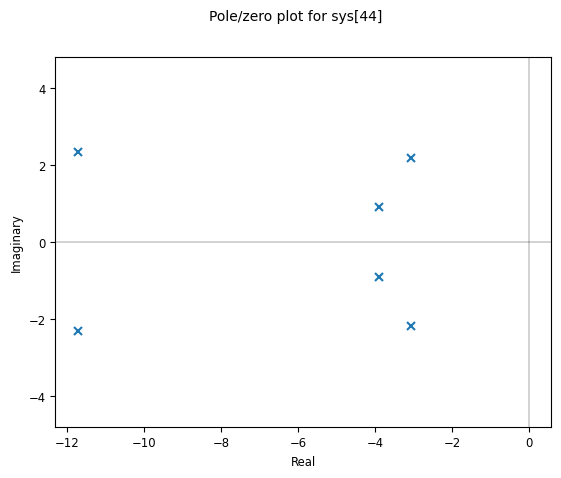

In [128]:
ct.pzmap(CL_U)

### Observador de ordem reduzida


In [129]:
J = (ct.place(A22.T, A12.T, [-2.5 + 8j, -2.5 - 8j, -3])).T
J

array([[ 3.  ,  0.29, -0.14],
       [-0.  , -1.16, 10.16],
       [-0.  , -4.36,  0.06]])

In [130]:
F = A22 - J @ A12
G = A21  - J @ A11 + F @ J
H = B2 - J @ B1
S = M + N @ J

F

array([[-3. ,  0. ,  0. ],
       [ 0. , -2.5, -8. ],
       [ 0. ,  8. , -2.5]])

In [131]:
# autovalores e autovetores da dinâmica do erro em MF
la.eig(F), S

((array([-2.5+8.j, -2.5-8.j, -3. +0.j]),
  array([[0.        +0.j        , 0.        -0.j        ,
          1.        +0.j        ],
         [0.70710678+0.j        , 0.70710678-0.j        ,
          0.        +0.j        ],
         [0.        -0.70710678j, 0.        +0.70710678j,
          0.        +0.j        ]])),
 array([[ 1.  ,  0.  ,  0.  ],
        [ 0.  ,  1.  ,  0.  ],
        [ 0.  ,  0.  ,  1.  ],
        [ 3.  ,  0.29, -0.14],
        [ 0.  , -1.16, 10.16],
        [ 0.  , -4.36,  0.06]]))

In [132]:
Aa = np.block([[A, np.zeros((n, n-m))], 
          [G @ C, F]])
Aa

array([[  0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   0.  ,
          0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
          0.  ],
       [  0.  ,  -7.36,   0.79,   0.  ,   0.29,  -0.14,   0.  ,   0.  ,
          0.  ],
       [  0.  ,  73.58, -33.11,   0.  ,  -3.66,   2.16,   0.  ,   0.  ,
          0.  ],
       [  0.  , -58.86,  51.15,   0.  ,   3.64,  -2.44,   0.  ,   0.  ,
          0.  ],
       [ -9.  ,  -8.23,   1.21,   0.  ,   0.  ,   0.  ,  -3.  ,   0.  ,
          0.  ],
       [  0.  , 111.36, -58.99,   0.  ,   0.  ,   0.  ,   0.  ,  -2.5 ,
         -8.  ],
       [  0.  , -57.24, 132.28,   0.  ,   0.  ,   0.  ,   0.  ,   8.  ,
         -2.5 ]])

In [133]:
Ba = np.block([[B], [H]])
Ba

array([[  0.  ,   0.  ],
       [  0.  ,   0.  ],
       [  0.  ,   0.  ],
       [  0.61,   1.79],
       [ -1.5 , -27.  ],
       [  0.29,  30.54],
       [  0.61,   1.79],
       [ -1.5 , -27.  ],
       [  0.29,  30.54]])

In [134]:
Ea = np.block([[E], [np.zeros((n-m, l))]])
Ea

array([[  0.  ],
       [  0.  ],
       [  0.  ],
       [  0.29],
       [-12.  ],
       [ 18.54],
       [  0.  ],
       [  0.  ],
       [  0.  ]])

### Controlador + Observador

In [135]:
Aa_c = Aa - Ba @ K @ np.block([S @ C, N])
Aa_c

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.49090340e+01, -2.11955585e+00,  2.25159952e+02,
         0.00000000e+00,  2.90000000e-01, -1.40000000e-01,
         2.28844993e+01,  1.83671863e+01,  1.35645768e+01],
       [-7.42988470e+02, -4.34330558e+01, -1.37544040e+03,
         0.00000000e+00, -3.66000000e+00,  2.16000000e+00,
        -1.71292322e+02, -1.17795687e+02, -7.69235154e+01],
       [ 7.14624518e+02,  8.04297697e+01,  1.19648445e+03,
         0.00000000e+00,  3.64000000e+00, -2.440000

In [136]:
# polos em MF
la.eigvals(Aa_c)

array([-11.71150468+2.32563477j, -11.71150468-2.32563477j,
        -3.05118009+2.17432413j,  -3.05118009-2.17432413j,
        -3.89940812+0.90076334j,  -3.89940812-0.90076334j,
        -3.        +0.j        ,  -2.5       +8.j        ,
        -2.5       -8.j        ])

In [137]:
F_obs = -K @ np.block([S @ C, N])

F_obs.shape, Ea.shape


((2, 9), (9, 1))

In [138]:
CO_U = ct.ss(Aa_c, Ea, -K @ np.block([S @ C, N]), np.zeros((2,1)))
CO_X0 = ct.ss(Aa_c, Ea, np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0]]), np.array([[0]]))
CO_X1 = ct.ss(Aa_c, Ea, np.array([[0, 1, 0, 0, 0, 0, 0, 0, 0]]), np.array([[0]]))
CO_X2 = ct.ss(Aa_c, Ea, np.array([[0, 0, 1, 0, 0, 0, 0, 0, 0]]), np.array([[0]]))

CO_U

StateSpace(array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.49090340e+01, -2.11955585e+00,  2.25159952e+02,
         0.00000000e+00,  2.90000000e-01, -1.40000000e-01,
         2.28844993e+01,  1.83671863e+01,  1.35645768e+01],
       [-7.42988470e+02, -4.34330558e+01, -1.37544040e+03,
         0.00000000e+00, -3.66000000e+00,  2.16000000e+00,
        -1.71292322e+02, -1.17795687e+02, -7.69235154e+01],
       [ 7.14624518e+02,  8.04297697e+01,  1.19648445e+03,
         0.00000000e+00,  3.64000000e+00

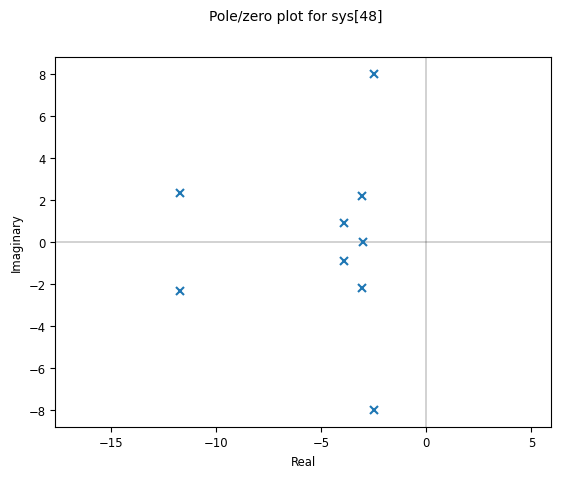

In [139]:
ct.pzmap(CO_U)

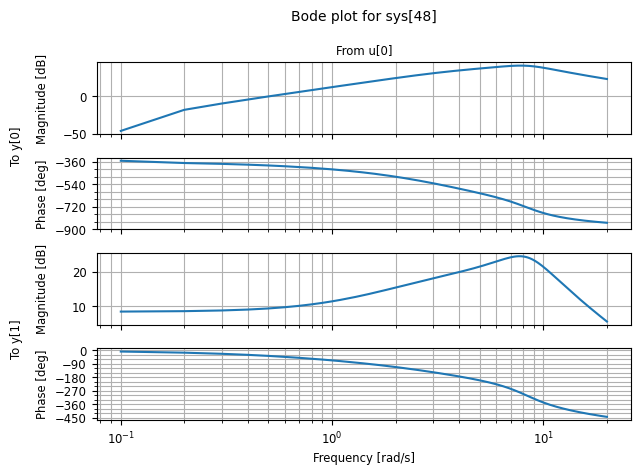

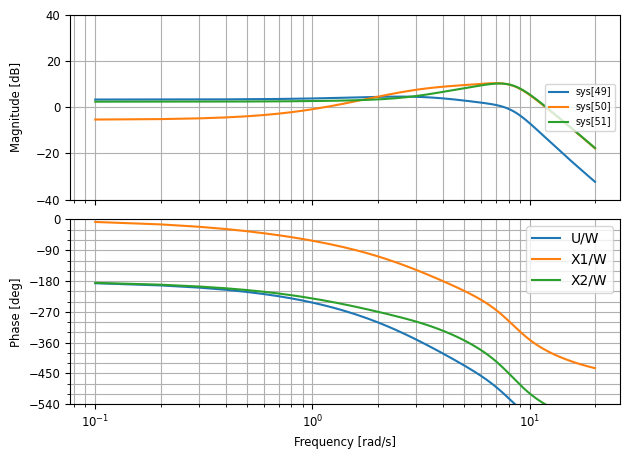

In [140]:

BPOU = ct.bode(CO_U, omega=np.linspace(0.1, 20, 201), dB=True)
BPOU = ct.bode(CO_X0, omega=np.linspace(0.1, 20, 201), dB=True)
BPOU = ct.bode(CO_X1, omega=np.linspace(0.1, 20, 201), dB=True)
BPOU = ct.bode(CO_X2, omega=np.linspace(0.1, 20, 201), dB=True)

mag_ax = plt.subplot(2, 1, 1)  # magnitude plot
phase_ax = plt.subplot(2, 1, 2)  # phase plot

mag_ax.set_ylim([-40, 40])  # y-limits (magnitude plot)
phase_ax.set_ylim([-540, 0])  # y-limits (phase plot)
plt.legend(["U/W", "X1/W", "X2/W"])

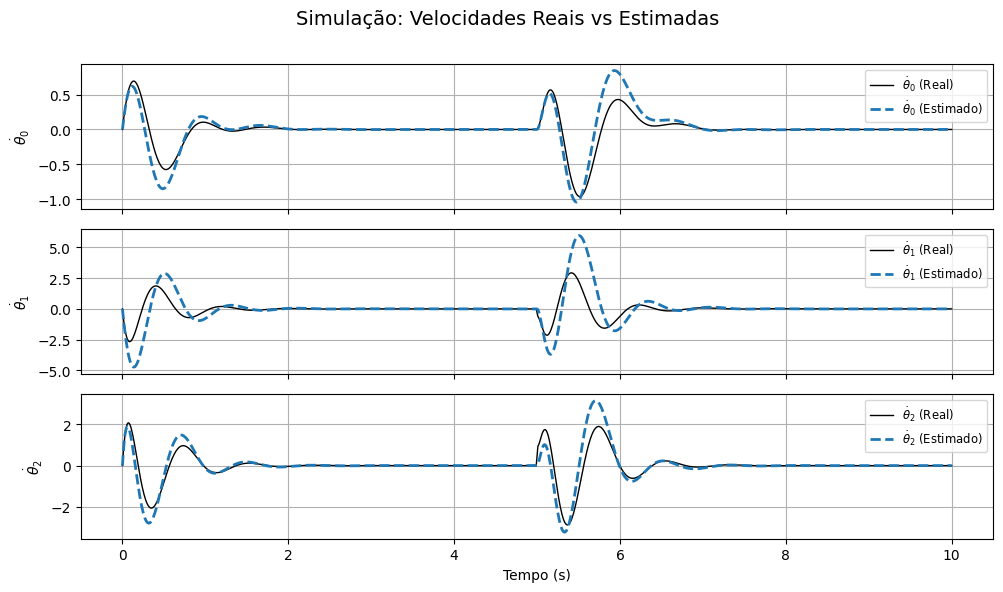

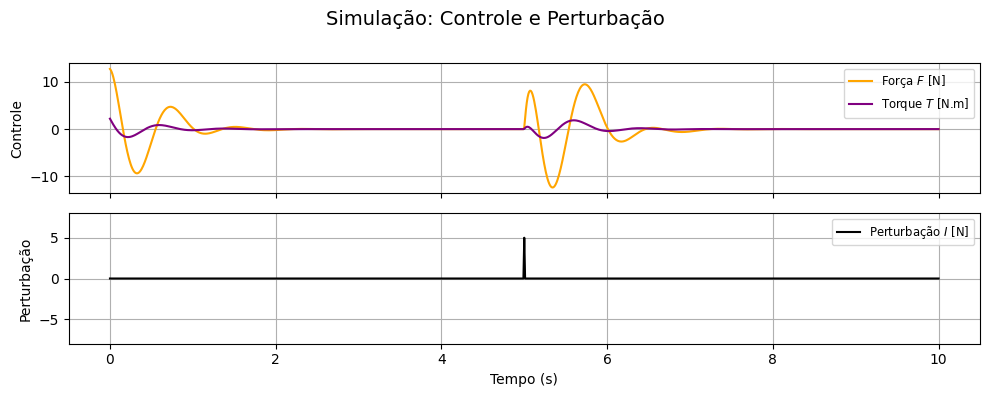

In [141]:
ts = np.linspace(0, 10, 1001)
dt = ts[1] - ts[0]
w_in = np.zeros((E.shape[1], len(ts)))

p_start = 5.0
p_dur = dt
p_mag = 5

idx_start = np.where(ts >= p_start)[0][0]
idx_end = np.where(ts >= p_start + p_dur)[0][0]
if idx_start == idx_end and ts[idx_start] < p_start + p_dur:
    if idx_end + 1 < len(ts):
        idx_end += 1
    else:
        idx_end = len(ts)
w_in[0, idx_start:idx_end] = p_mag

x0_initial_plant = np.array([0.0, 0.1, 0.05, 0.0, 0.0, 0.0], dtype=np.float64)
x0_initial_obs_reduced = np.array([0.0, 0.0, 0.0], dtype=np.float64)

X0_composite = np.concatenate((x0_initial_plant, x0_initial_obs_reduced)).reshape(-1, 1)
CO_U_sys = ct.ss(Aa_c, Ea, F_obs, np.zeros((K.shape[0], Ea.shape[1])))
t_sim, u_controls, x_composite_states = ct.forced_response(CO_U_sys, U=w_in, T=ts, X0=X0_composite, return_x=True)

x_hat_sim = M @ C @ x_composite_states[0:n, :] + N @ x_composite_states[n:, :]

state_labels = [
    r'$\theta_0$', r'$\theta_1$', r'$\theta_2$',
    r'$\dot{\theta}_0$', r'$\dot{\theta}_1$', r'$\dot{\theta}_2$'
]

indices_para_plotar = [3, 4, 5]  # \dot{θ}_0, \dot{θ}_1, \dot{θ}_2
fig1, axs1 = plt.subplots(len(indices_para_plotar), 1, figsize=(10, 6), sharex=True)

for i, idx in enumerate(indices_para_plotar):
    axs1[i].plot(t_sim, x_composite_states[idx, :], linewidth=1.0, color='k', label=state_labels[idx] + ' (Real)')
    axs1[i].plot(t_sim, x_hat_sim[idx, :], linewidth=2.0, linestyle='--', label=state_labels[idx] + ' (Estimado)')
    axs1[i].set_ylabel(state_labels[idx])
    axs1[i].legend(loc='upper right', fontsize='small')
    axs1[i].grid(True)

axs1[-1].set_xlabel('Tempo (s)')
fig1.suptitle('Simulação: Velocidades Reais vs Estimadas', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
fig2, axs2 = plt.subplots(2, 1, figsize=(10, 4), sharex=True)

# Controle
axs2[0].plot(t_sim, u_controls[0, :], color='orange', label=r'Força $F$ [N]')
axs2[0].plot(t_sim, u_controls[1, :], color='purple', label=r'Torque $T$ [N.m]')
axs2[0].set_ylabel('Controle')
axs2[0].legend(loc='upper right', fontsize='small')
axs2[0].grid(True)

# Perturbação
axs2[1].plot(ts, w_in[0, :], color='black', label=r'Perturbação $I$ [N]')
axs2[1].set_ylabel('Perturbação')
axs2[1].set_xlabel('Tempo (s)')
axs2[1].set_ylim([-8, 8])
axs2[1].legend(loc='upper right', fontsize='small')
axs2[1].grid(True)

fig2.suptitle('Simulação: Controle e Perturbação', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [142]:
C_ref = C[0:2, :] #saídas a seguir a referência: theta0 e theta1

A_cl_lqr = A - B @ K

A_cl_full = Aa + Ba @ F_obs

G_static_cl_lqr = C_ref @ la.solve(-A_cl_lqr, B) # ganho estático LQR

N_bar_multi = la.inv(G_static_cl_lqr)

B_combined_input = np.block([Ea, Ba @ N_bar_multi])


C_aug_ref = np.hstack((C_ref, np.zeros((2, n - m))))


B_r = B_combined_input[:, 1:]  # parte que multiplica r_in

C_aug_ref = np.hstack((C_ref, np.zeros((2, n - m))))
G_static_aug = C_aug_ref @ la.solve(-A_cl_full, B_r)
N_bar_aug = la.inv(G_static_aug)

G_static_aug = C_aug_ref @ la.solve(-A_cl_full, B_r)
N_bar_aug = la.inv(G_static_aug)

In [143]:
# 3. Simulação com o Seguidor de Referência

#  Referências para theta0 e theta1 (degrau)
ts = np.linspace(0, 10, 1001)
dt = ts[1] - ts[0]

r_in_theta0_mag = 0.1
r_in_theta1_mag = 0.05
r_in_theta0 = np.zeros_like(ts)
r_in_theta1 = np.zeros_like(ts)

# Degrau para theta0
r_start_theta0 = 0.0
r_dur_theta0 = 11.0
idx_start_r0_array = np.where(ts >= r_start_theta0)[0]
if idx_start_r0_array.size > 0:
    idx_start_r0 = idx_start_r0_array[0]
else:
    idx_start_r0 = len(ts)

idx_end_r0_array = np.where(ts >= r_start_theta0 + r_dur_theta0)[0]
if idx_end_r0_array.size > 0:
    idx_end_r0 = idx_end_r0_array[0]
else:
    idx_end_r0 = len(ts)

if idx_start_r0 < len(ts):
    r_in_theta0[idx_start_r0:idx_end_r0] = r_in_theta0_mag


# Degrau para theta1
r_start_theta1 = 5.0
r_dur_theta1 = 11.0 
idx_start_r1_array = np.where(ts >= r_start_theta1)[0]
if idx_start_r1_array.size > 0:
    idx_start_r1 = idx_start_r1_array[0]
else:
    idx_start_r1 = len(ts)
idx_end_r1_array = np.where(ts >= r_start_theta1 + r_dur_theta1)[0]
if idx_end_r1_array.size > 0:
    idx_end_r1 = idx_end_r1_array[0]
else:
    idx_end_r1 = len(ts)

if idx_start_r1 < len(ts):
    r_in_theta1[idx_start_r1:idx_end_r1] = r_in_theta1_mag

r_in = np.vstack((r_in_theta0, r_in_theta1))

w_in = np.zeros((E.shape[1], len(ts)))
p_start = 5.0
p_dur = dt
p_mag = 5
idx_start = np.where(ts >= p_start)[0][0]
idx_end = np.where(ts >= p_start + p_dur)[0][0]
if idx_start == idx_end and ts[idx_start] < p_start + p_dur:
    if idx_end + 1 < len(ts):
        idx_end += 1
    else:
        idx_end = len(ts)
w_in[0, idx_start:idx_end] = p_mag

x0_initial_plant = np.array([0.0, 0.05, 0.1, 0.0, 0.0, 0.0], dtype=np.float64)
x0_initial_obs_reduced = np.array([0.0, 0.0, 0.0], dtype=np.float64)
X0_composite = np.concatenate((x0_initial_plant, x0_initial_obs_reduced)).reshape(-1, 1)

combined_inputs = np.concatenate((w_in, r_in), axis=0)

sys_follower = ct.ss(A_cl_full, B_combined_input, np.eye(n+(n-m)), np.zeros((n+(n-m), 3)))

t_sim, y_sim, x_composite_states_follower = ct.forced_response(sys_follower, U=combined_inputs, T=ts, X0=X0_composite, return_x=True)

# Extrair as saídas da planta
x_plant_follower_multi = x_composite_states_follower[0:n, :]

# Extrair a estimativa de estado completa
x_hat_follower_multi = S @ C @ x_plant_follower_multi + N @ x_composite_states_follower[n:, :]

# Calcular os sinais de controle gerados
u_controls_follower_multi = F_obs @ x_composite_states_follower + N_bar_aug @ r_in



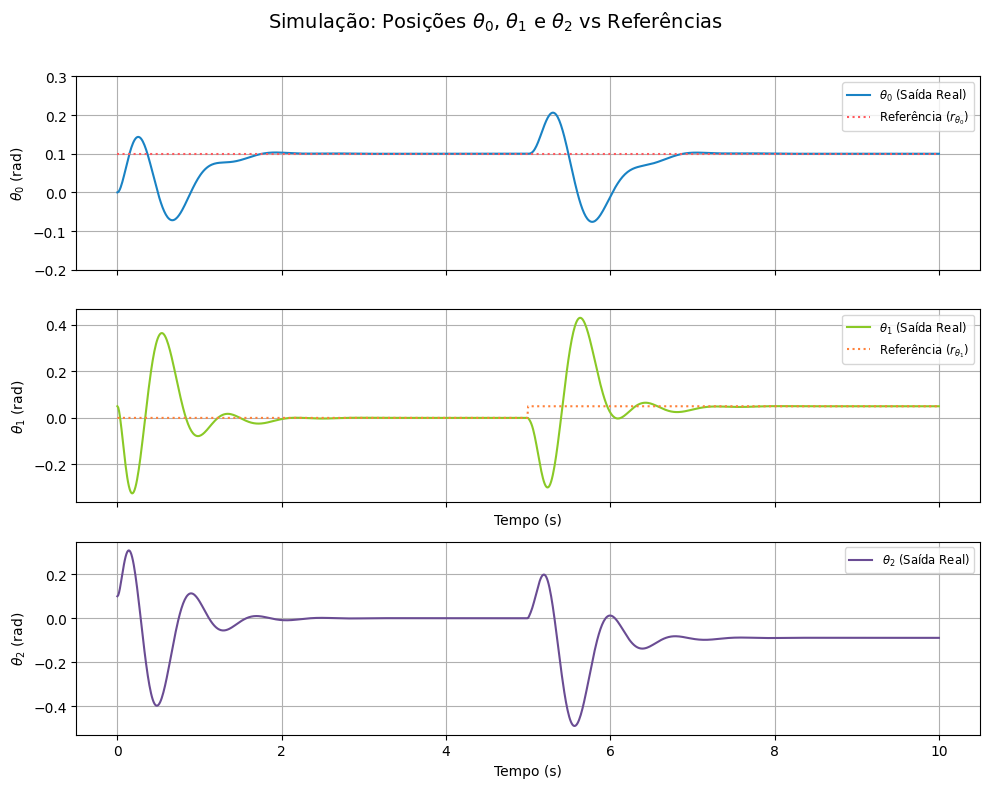

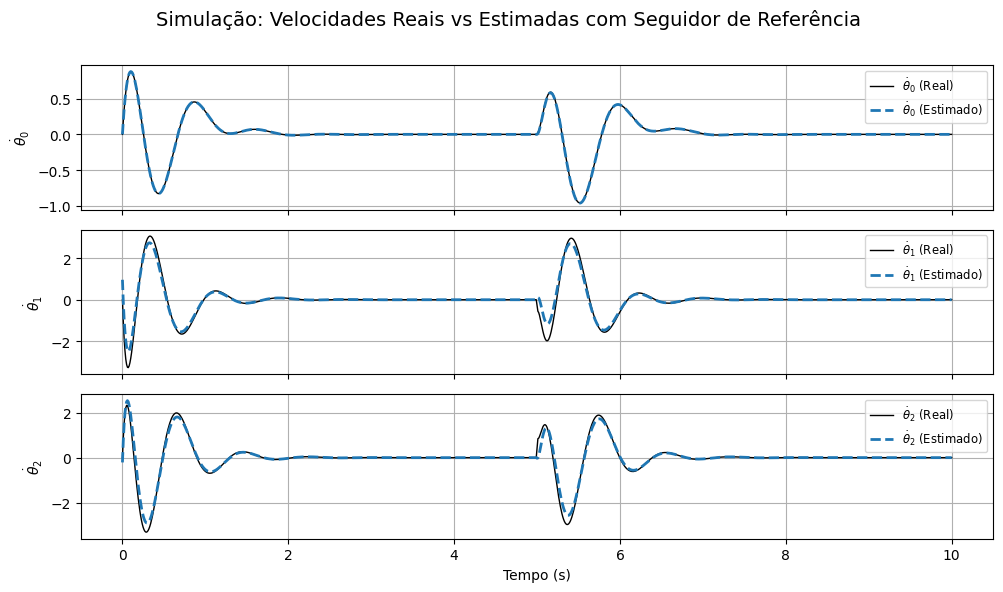

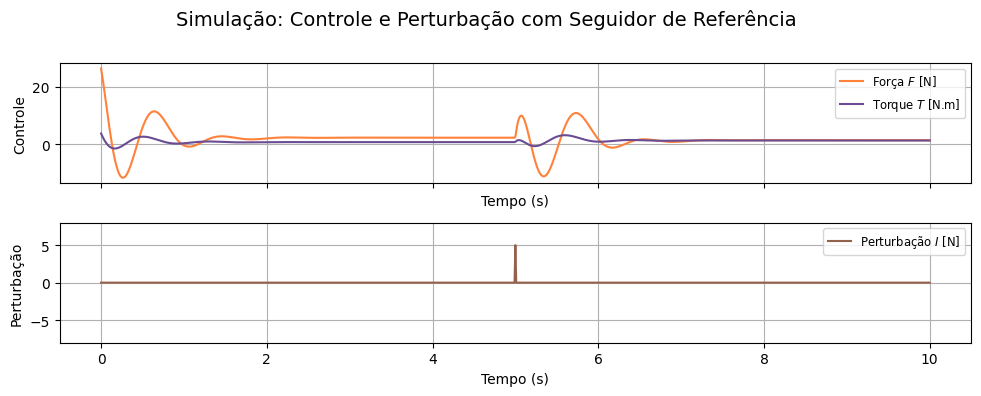

In [144]:
# --- Plotagem dos Resultados ---

# Labels para os estados
state_labels = [
    r'$\\theta_0$', r'$\\theta_1$', r'$\\theta_2$',
    r'$\dot{\theta}_0$', r'$\dot{\theta}_1$', r'$\dot{\theta}_2$'
]

# 1. Simulação: Posições Theta0 e Theta1 vs Referências
fig3, axs3 = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Theta0
axs3[0].plot(t_sim, x_plant_follower_multi[0, :], linewidth=1.5, color=cp['blue'], label=r'$\theta_0$ (Saída Real)')
axs3[0].plot(ts, r_in_theta0, linewidth=1.5, linestyle=':', color=cp['red'], label='Referência ($r_{\\theta_0}$)')
axs3[0].set_ylabel(r'$\theta_0\ \text{(rad)}$') 
axs3[0].set_ylim([-0.2, 0.3])
axs3[0].legend(loc='upper right', fontsize='small')
axs3[0].grid(True)

# Theta1
axs3[1].plot(t_sim, x_plant_follower_multi[1, :], linewidth=1.5, color=cp['green'], label=r'$\theta_1$ (Saída Real)')
axs3[1].plot(ts, r_in_theta1, linewidth=1.5, linestyle=':', color=cp['orange'], label='Referência ($r_{\\theta_1}$)')
axs3[1].set_ylabel(r'$\theta_1\ \text{(rad)}$')
axs3[1].set_xlabel('Tempo (s)')
axs3[1].legend(loc='upper right', fontsize='small')
axs3[1].grid(True)

# Theta2
axs3[2].plot(t_sim, x_plant_follower_multi[2, :], linewidth=1.5, color=cp['purple'], label=r'$\theta_2$ (Saída Real)')
axs3[2].set_ylabel(r'$\theta_2\ \text{(rad)}$')
axs3[2].set_xlabel('Tempo (s)')
axs3[2].legend(loc='upper right', fontsize='small')
axs3[2].grid(True)


fig3.suptitle('Simulação: Posições $\\theta_0$, $\\theta_1$ e $\\theta_2$ vs Referências', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# 2. Simulação: Velocidades Reais vs Estimadas (para as três velocidades)
indices_para_plotar_vel = [3, 4, 5]
fig1, axs1 = plt.subplots(len(indices_para_plotar_vel), 1, figsize=(10, 6), sharex=True)

for i, idx in enumerate(indices_para_plotar_vel):
    axs1[i].plot(t_sim, x_plant_follower_multi[idx, :], linewidth=1.0, color='k', label=state_labels[idx] + ' (Real)')
    axs1[i].plot(t_sim, x_hat_follower_multi[idx, :], linewidth=2.0, linestyle='--', label=state_labels[idx] + ' (Estimado)')
    axs1[i].set_ylabel(state_labels[idx])
    axs1[i].legend(loc='upper right', fontsize='small')
    axs1[i].grid(True)

axs1[-1].set_xlabel('Tempo (s)')
fig1.suptitle('Simulação: Velocidades Reais vs Estimadas com Seguidor de Referência', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# 3. Simulação: Sinais de Controle e Perturbação
fig2, axs2 = plt.subplots(2, 1, figsize=(10, 4), sharex=True)

# Controle
axs2[0].plot(t_sim, u_controls_follower_multi[0, :], color=cp['orange'], label=r'Força $F$ [N]')
axs2[0].plot(t_sim, u_controls_follower_multi[1, :], color=cp['purple'], label=r'Torque $T$ [N.m]')
axs2[0].set_ylabel('Controle')
axs2[0].set_xlabel('Tempo (s)')
axs2[0].legend(loc='upper right', fontsize='small')
axs2[0].grid(True)

# Perturbação
axs2[1].plot(ts, w_in[0, :], color=cp['brown'], label=r'Perturbação $I$ [N]')
axs2[1].set_ylabel('Perturbação')
axs2[1].set_xlabel('Tempo (s)')
axs2[1].set_ylim([-8, 8])
axs2[1].legend(loc='upper right', fontsize='small')
axs2[1].grid(True)

fig2.suptitle('Simulação: Controle e Perturbação com Seguidor de Referência', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()